In [8]:
import pandas as pd
import os
from itables import show
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [9]:
#finding out how many cpu cores you have
!wmic cpu get NumberOfCores,NumberOfLogicalProcessors

#divide the work between the existing cores - 1
os.environ['OMP_NUM_THREADS']='7'

NumberOfCores  NumberOfLogicalProcessors  

4              8                          





In [37]:
traffic = pd.read_csv('traffic_2020-2022.csv')
weather = pd.read_csv('weather_data_hourly.csv')
emissions = pd.read_csv('emission_huegelstr_hourly.csv')

# Data from Umweltbundesamt

In [11]:
percentage_emission = pd.read_csv('D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\air_emission_umweltbundesamt.CSV', sep = ';')
percentage_emission.replace(',', '.', regex=True, inplace=True)
percentage_emission.set_index('Unnamed: 0', inplace=True)
percentage_emission = percentage_emission[['O3', 'PM2,5', 'NO2']].astype('float')

percentage_emission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2000 to 2022
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O3      23 non-null     float64
 1   PM2,5   23 non-null     float64
 2   NO2     23 non-null     float64
dtypes: float64(3)
memory usage: 736.0 bytes


In [12]:
percentage_emission_dl = percentage_emission.reset_index()
percentage_emission_dl.to_csv('percentage_emission.csv', index = False)

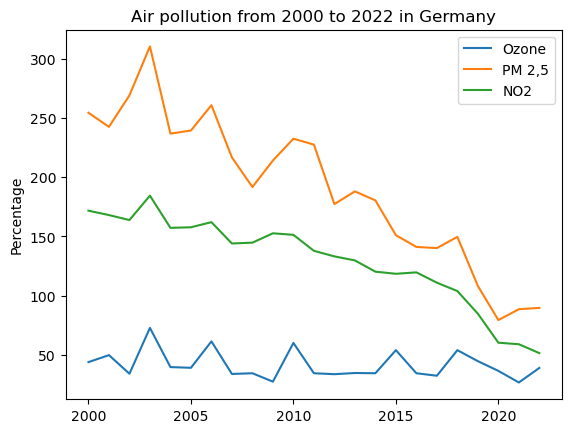

In [13]:
plt.plot(percentage_emission)
plt.title('Air pollution from 2000 to 2022 in Germany')
plt.ylabel('Percentage')
plt.legend(labels = ['Ozone','PM 2,5','NO2'])
plt.show()

# Correlation Emission and Weather

## Luftfeuchte / Verkehr

In [14]:
luftfeuchte_verkehr = pd.DataFrame()

In [15]:
luftfeuchte = pd.DataFrame({'luftfeuchte': weather['Relative Luftfeuchtigkeit[%]'], 'timestamp': weather['timestamp']})
luftfeuchte


,luftfeuchte,timestamp
0,75.75,2018-01-01 00:00:00
1,63.35,2018-01-01 01:00:00
2,65.25,2018-01-01 02:00:00
3,63.05,2018-01-01 03:00:00
4,60.95,2018-01-01 04:00:00
...,...,...
50070,93.90,2023-09-18 06:00:00
50071,88.10,2023-09-18 07:00:00
50072,83.40,2023-09-18 08:00:00
50073,78.10,2023-09-18 09:00:00


In [16]:
pm25 = pd.DataFrame({'pm25': emissions['PM2,5'], 'timestamp': emissions['timestamp']})
value = pm25['pm25'].mean().round(2)
pm25['pm25'] = pm25['pm25'].fillna(value)
pm25

,pm25,timestamp
0,9.11,2018-01-01 00:00:00
1,9.11,2018-01-01 01:00:00
2,9.11,2018-01-01 02:00:00
3,9.11,2018-01-01 03:00:00
4,9.11,2018-01-01 04:00:00
...,...,...
50070,9.00,2023-09-18 06:00:00
50071,9.25,2023-09-18 07:00:00
50072,8.20,2023-09-18 08:00:00
50073,7.80,2023-09-18 09:00:00


In [17]:
luftfeuchte_verkehr  = luftfeuchte.merge(pm25, how = 'left', on = 'timestamp')

luftfeuchte_verkehr

,luftfeuchte,timestamp,pm25
0,75.75,2018-01-01 00:00:00,9.11
1,63.35,2018-01-01 01:00:00,9.11
2,65.25,2018-01-01 02:00:00,9.11
3,63.05,2018-01-01 03:00:00,9.11
4,60.95,2018-01-01 04:00:00,9.11
...,...,...,...
50070,93.90,2023-09-18 06:00:00,9.00
50071,88.10,2023-09-18 07:00:00,9.25
50072,83.40,2023-09-18 08:00:00,8.20
50073,78.10,2023-09-18 09:00:00,7.80


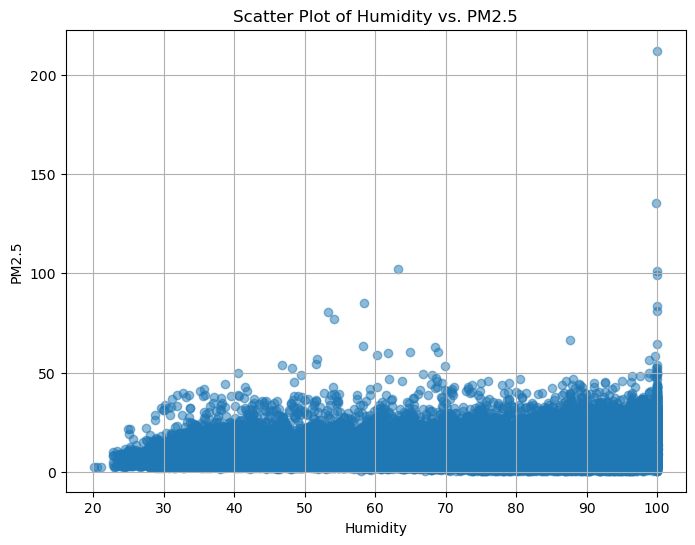

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(luftfeuchte_verkehr['luftfeuchte'], luftfeuchte_verkehr['pm25'], alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('PM2.5')
plt.title('Scatter Plot of Humidity vs. PM2.5')
plt.grid(True)
plt.show()


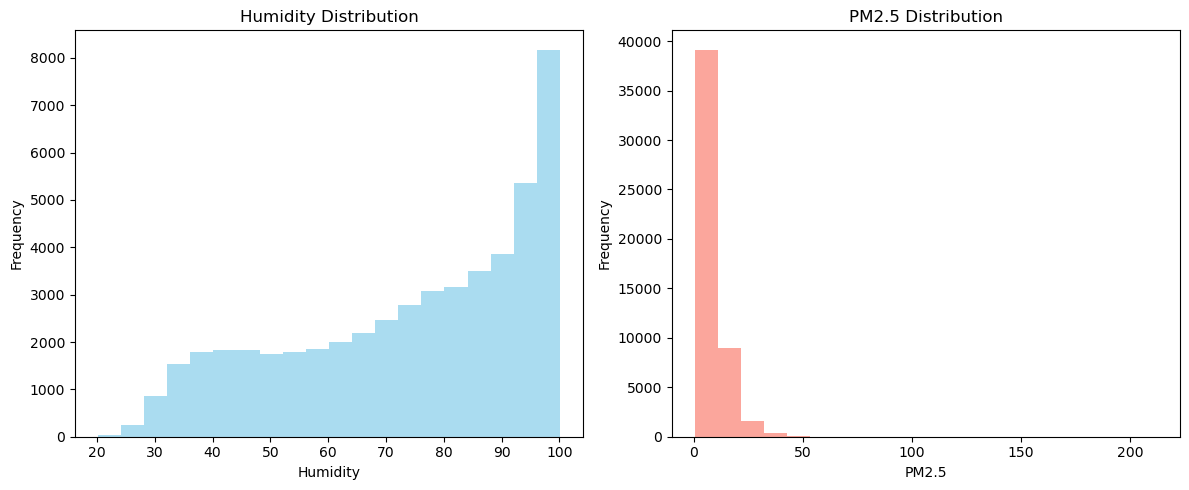

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(luftfeuchte_verkehr['luftfeuchte'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')

plt.subplot(1, 2, 2)
plt.hist(luftfeuchte_verkehr['pm25'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.title('PM2.5 Distribution')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

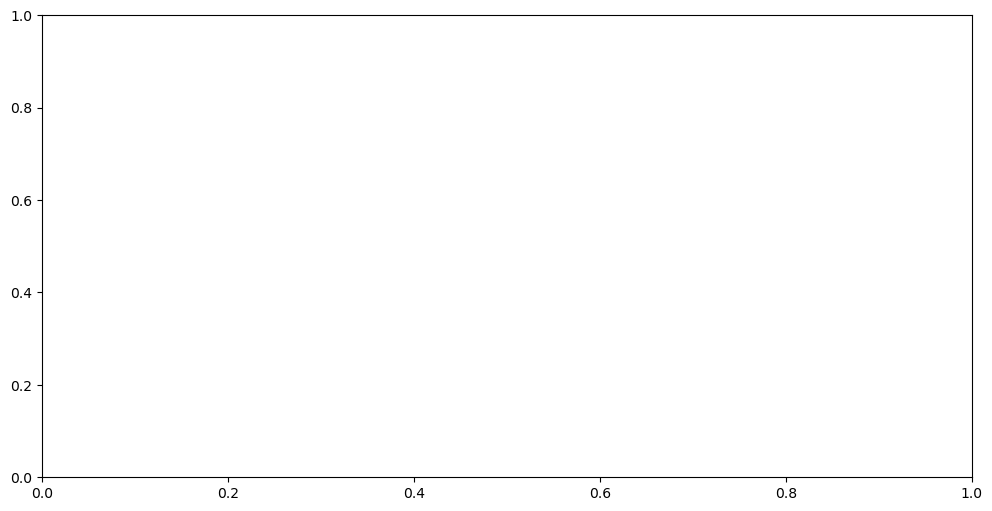

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(luftfeuchte_verkehr['timestamp'], luftfeuchte_verkehr['luftfeuchte'], label='Humidity')
plt.plot(luftfeuchte_verkehr['timestamp'], luftfeuchte_verkehr['pm25'], label='PM2.5')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.title('Humidity and PM2.5 Over Time')
plt.show()


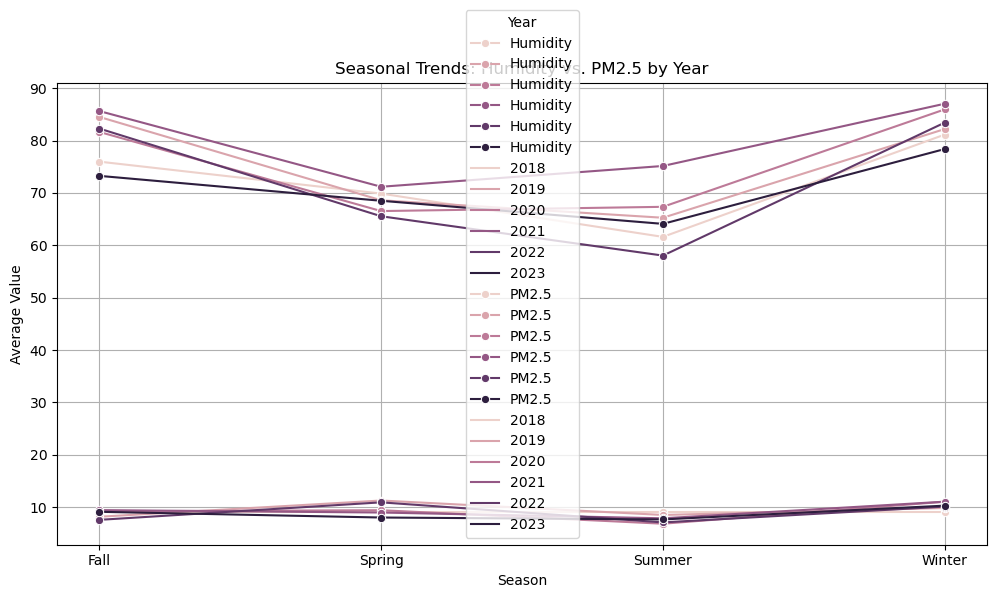

In [21]:
import seaborn as sns

luftfeuchte_verkehr['year'] = pd.to_datetime(luftfeuchte_verkehr['timestamp']).dt.year

# Create a new column for the season based on the timestamp
luftfeuchte_verkehr['season'] = pd.to_datetime(luftfeuchte_verkehr['timestamp']).dt.month.map({
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
})

# Calculate seasonal averages for each year
seasonal_data = luftfeuchte_verkehr.groupby(['year', 'season']).agg({'luftfeuchte': 'mean', 'pm25': 'mean'}).reset_index()

# Create a line graph with different lines for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_data, x='season', y='luftfeuchte', hue='year', marker='o', label='Humidity')
sns.lineplot(data=seasonal_data, x='season', y='pm25', hue='year', marker='o', label='PM2.5')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.title('Seasonal Trends: Humidity vs. PM2.5 by Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

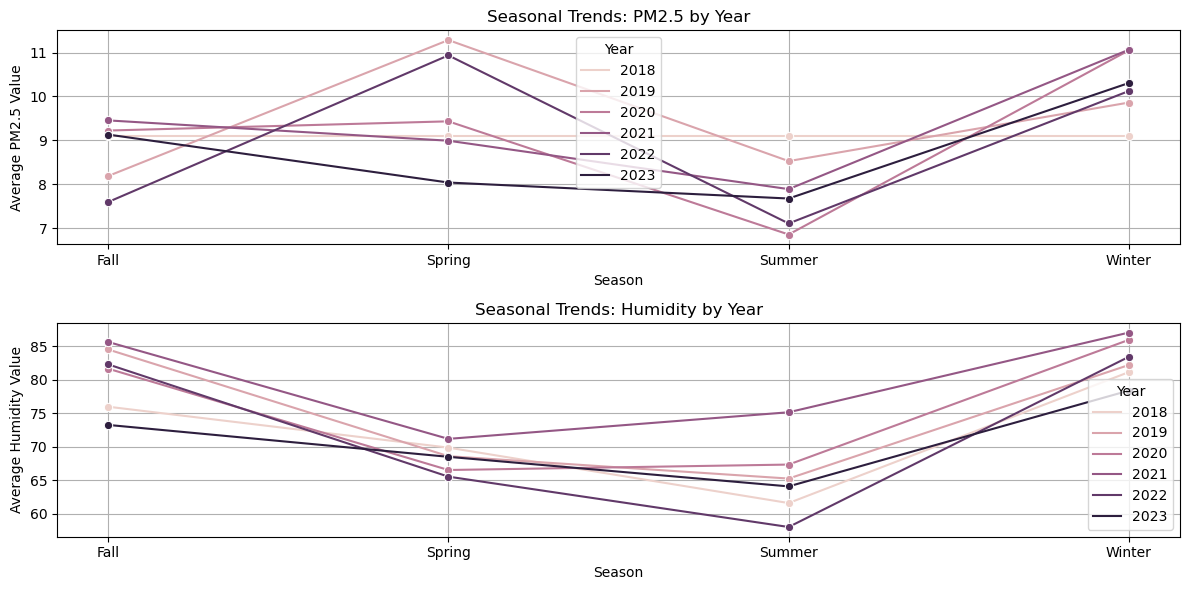

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the 'luftfeuchte_verkehr' DataFrame and have added the 'year' and 'season' columns

# Calculate seasonal averages for each year
seasonal_data = luftfeuchte_verkehr.groupby(['year', 'season']).agg({'luftfeuchte': 'mean', 'pm25': 'mean'}).reset_index()

# Create a subplot for PM2.5
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.lineplot(data=seasonal_data, x='season', y='pm25', hue='year', marker='o')
plt.xlabel('Season')
plt.ylabel('Average PM2.5 Value')
plt.title('Seasonal Trends: PM2.5 by Year')
plt.legend(title='Year')
plt.grid(True)

# Create a subplot for humidity
plt.subplot(2, 1, 2)
sns.lineplot(data=seasonal_data, x='season', y='luftfeuchte', hue='year', marker='o')
plt.xlabel('Season')
plt.ylabel('Average Humidity Value')
plt.title('Seasonal Trends: Humidity by Year')
plt.legend(title='Year')
plt.grid(True)

plt.tight_layout()
plt.show()


# Emissions

## Emissions over the years

In [53]:
emissions_month = emissions.copy()
emissions_month['year'] = pd.to_datetime(emissions_month['timestamp']).dt.year
emissions_month['month'] = pd.to_datetime(emissions_month['timestamp']).dt.month
emissions_month = emissions_month.groupby(['year','month']).mean()
emissions_month

C:\Users\cathr\AppData\Local\Temp\ipykernel_12876\569210075.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emissions_month = emissions_month.groupby(['year','month']).mean()


Benzol        CO  m-/p-Xylol   o-Xylol     PM2,5       PM10  \
year month                                                                  
2018 1      1.147945  0.382366    0.956869  0.384648       NaN  13.431653   
     2      1.396991  0.427262    0.949939  0.364240       NaN  27.509747   
     3      1.507133  0.423589    1.267462  0.446804       NaN  24.672581   
     4      1.232991  0.411083    1.670128  0.567368       NaN  19.967431   
     5      0.987402  0.388304    1.593407  0.459876       NaN  20.477218   
...              ...       ...         ...       ...       ...        ...   
2023 5      0.400164       NaN    0.683068  0.348644  8.649125  14.481561   
     6      0.661324       NaN    1.279036  1.053741  9.735972  17.470625   
     7      0.681193       NaN    1.271526  1.108641  6.521505  13.072648   
     8      0.713593       NaN    1.615529  1.049290  6.835753  12.500672   
     9      0.906626       NaN    1.150567  0.609039  9.132458  17.120048   

                  NO2         NO    Toluol  
year month                                  
2018 1      39.830956  44.636339  2.478828  
     2      44.513393  49.975298  2.563100  
     3      49.645699  52.107930  3.282867  
     4      54.951667  48.793056  3.837550  
     5      49.702890  42.327352  3.127048  
...               ...        ...       ...  
2023 5      16.208852   7.433887  0.918342  
     6      19.363162   6.923538  1.648619  
     7      19.636694   8.432124  1.747573  
     8      19.332863   8.781384  2.219958  
     9      21.020286   8.460859  2.092611  

[69 rows x 9 columns]

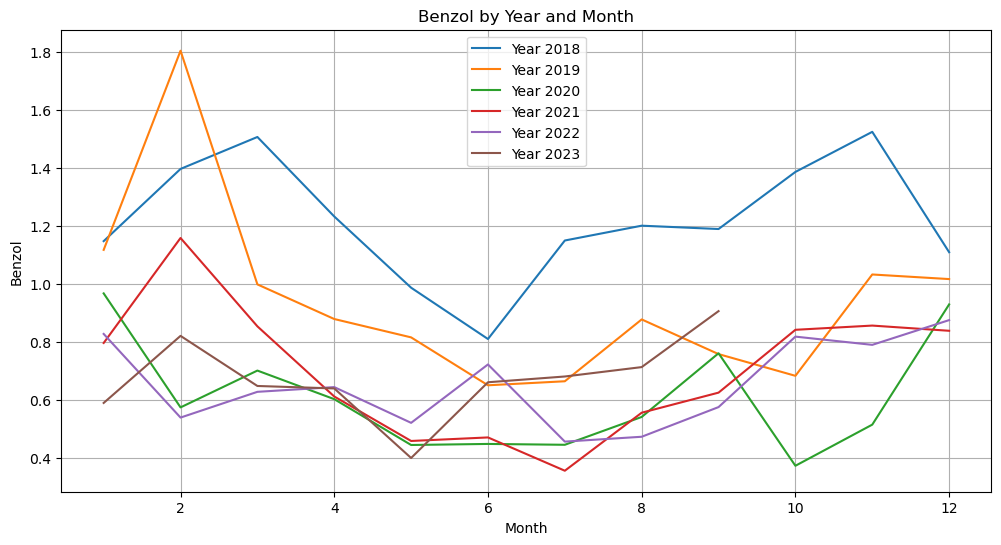

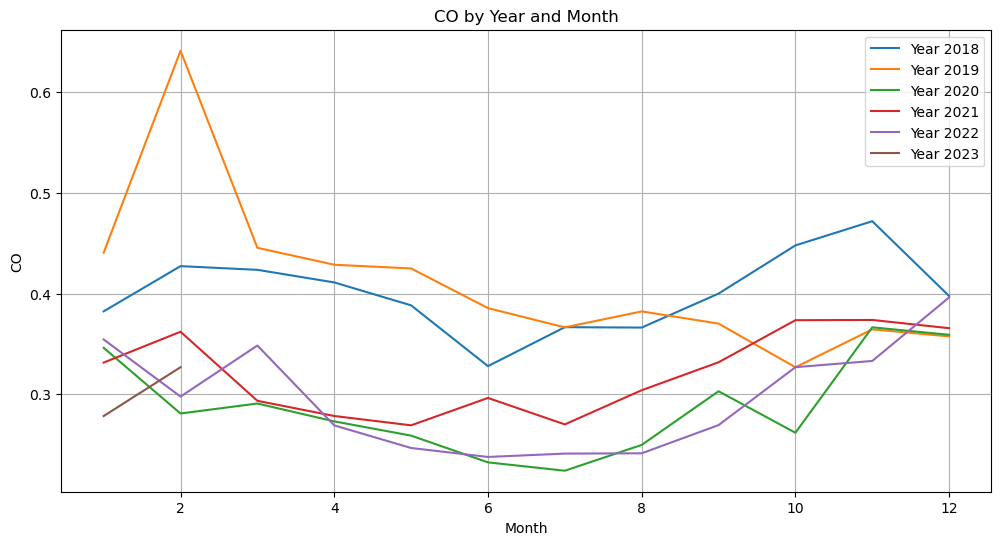

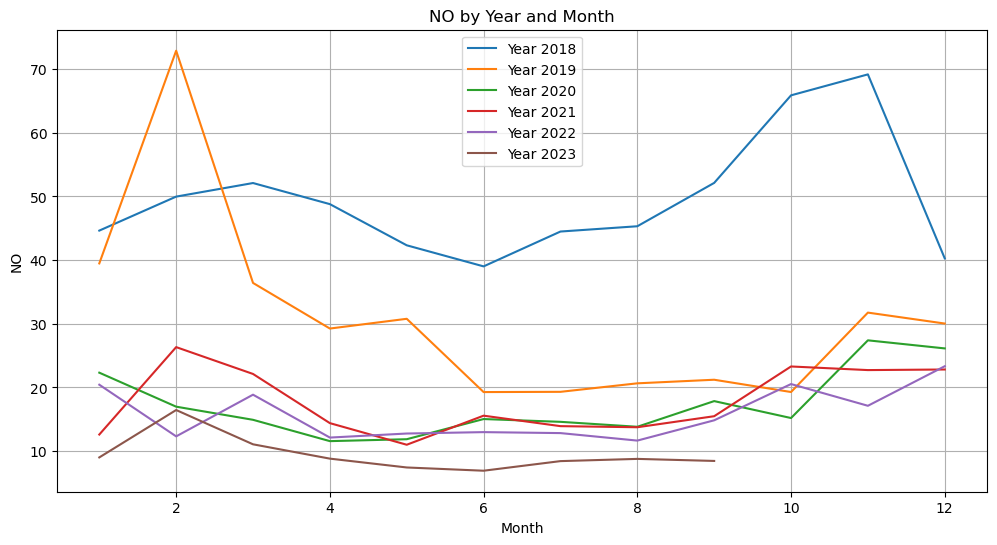

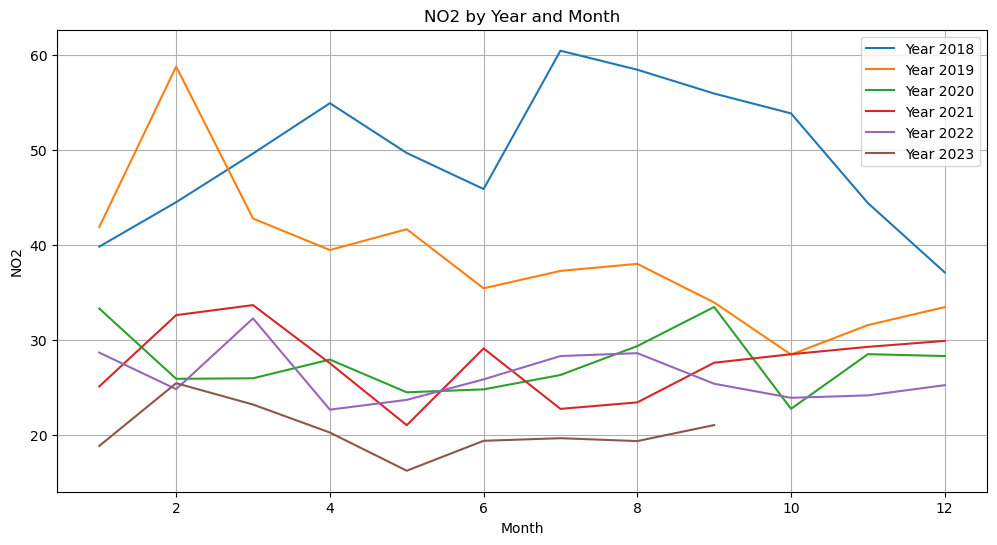

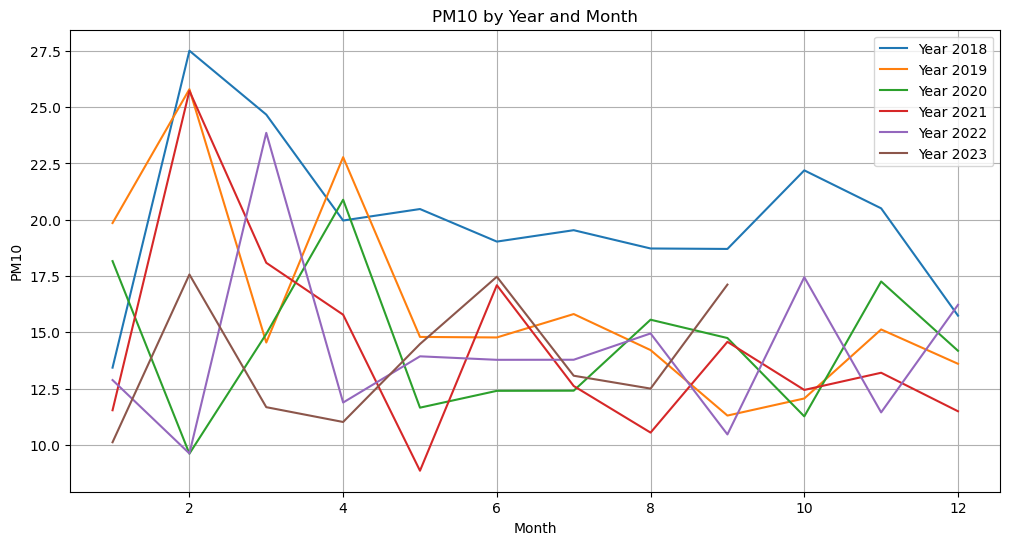

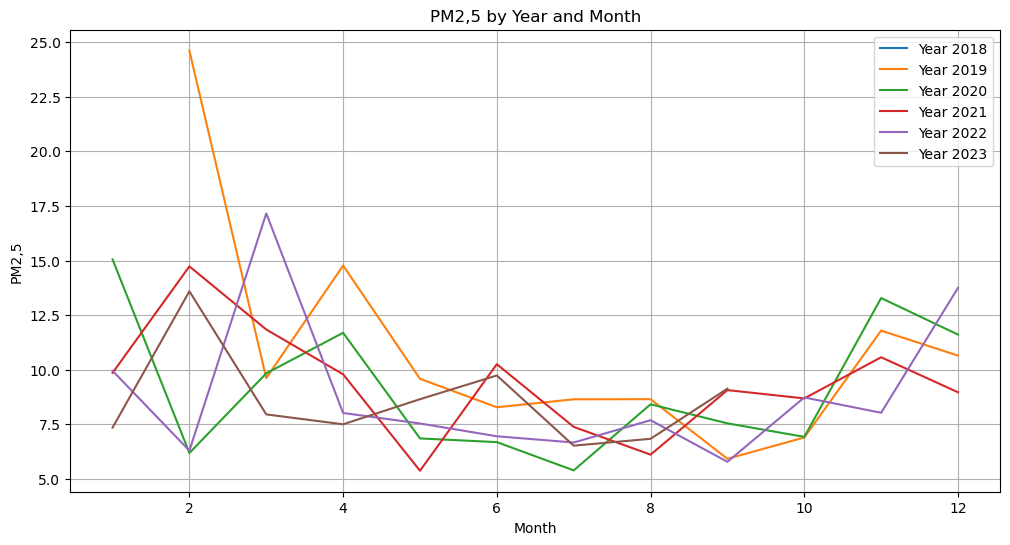

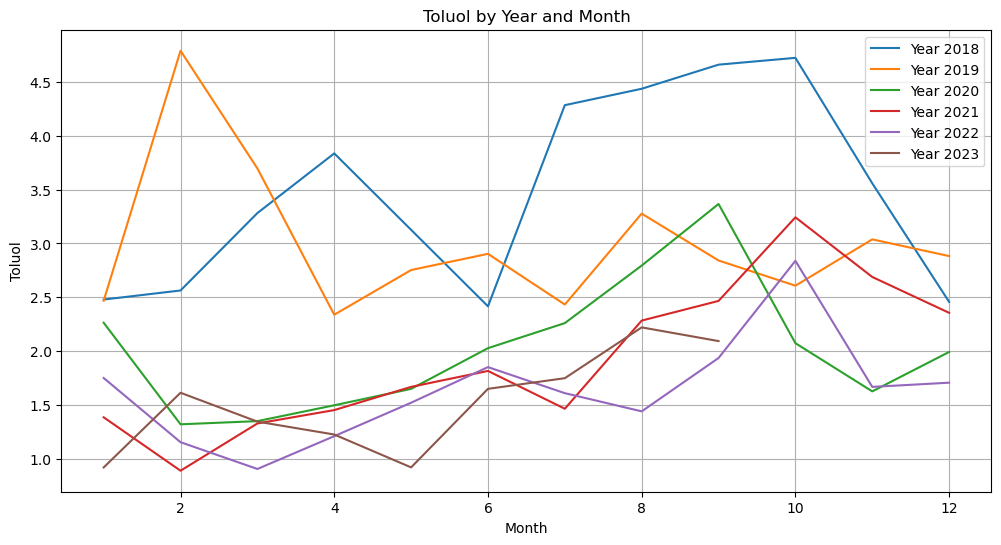

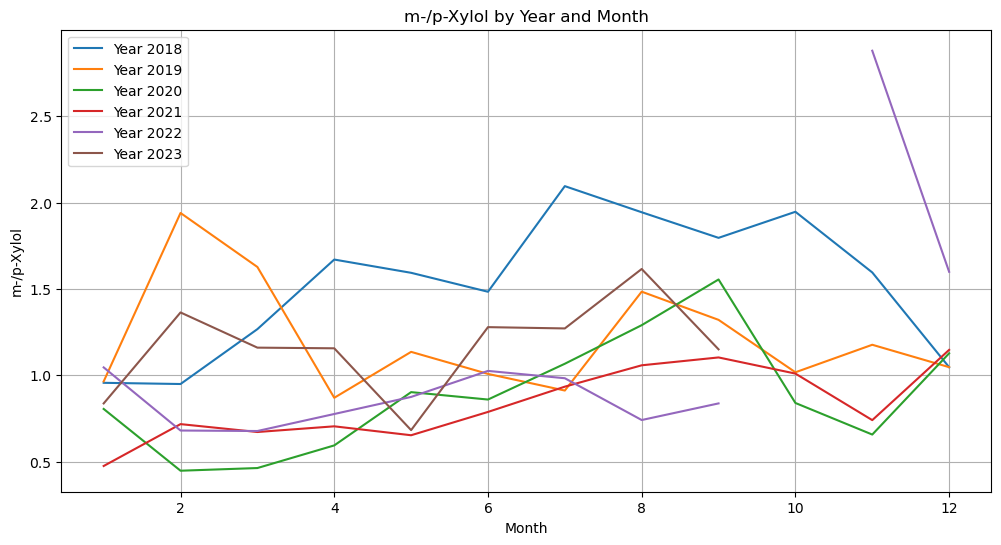

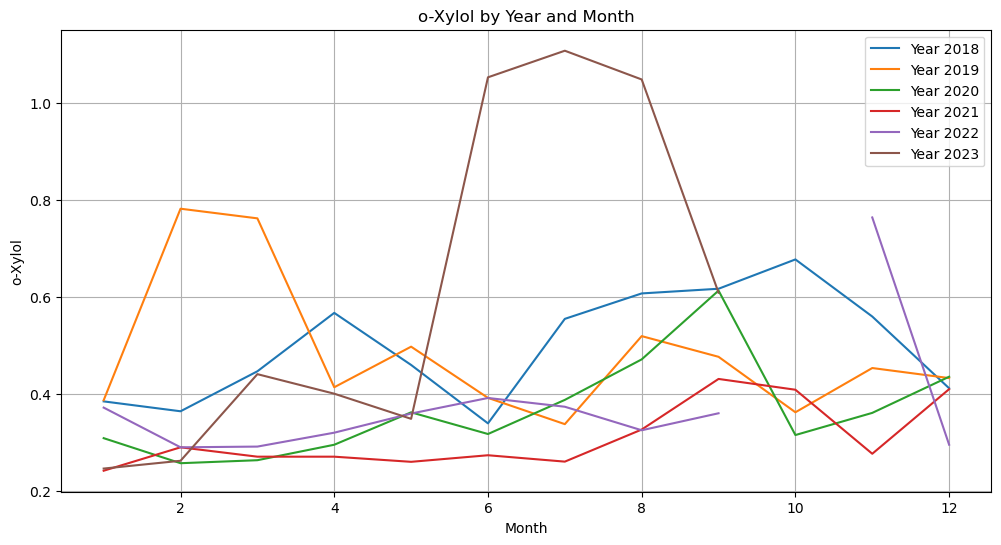

In [54]:
# distribution of pollutants per month

columns_to_plot = emissions_month.columns.difference(['year', 'month'])

# Loop through each column and create a separate plot for each year
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    
    for year in emissions_month.index.get_level_values('year').unique():
        year_data = emissions_month.loc[year].reset_index()
        plt.plot(year_data['month'], year_data[column], label=f'Year {year}')

    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'{column} by Year and Month')
    plt.legend()
    plt.grid(True)
    plt.show()


In [51]:
# emission distribution over weeks 
emissions_week = emissions.copy()
emissions_week['year'] = pd.to_datetime(emissions_week['timestamp']).dt.year
emissions_week['weeks'] = pd.to_datetime(emissions_week['timestamp']).dt.isocalendar().week
emissions_week = emissions_week.groupby(['year','weeks']).mean()
emissions_week

C:\Users\cathr\AppData\Local\Temp\ipykernel_12876\4042559811.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emissions_week = emissions_week.groupby(['year','weeks']).mean()


Benzol        CO  m-/p-Xylol   o-Xylol      PM2,5       PM10  \
year weeks                                                                   
2018 1      0.855895  0.306927    0.704368  0.319474        NaN  11.705990   
     2      1.746485  0.516548    1.278242  0.517939        NaN  20.671726   
     3      0.977439  0.347619    0.750305  0.291037        NaN   9.777679   
     4      1.180506  0.405060    1.140696  0.434937        NaN  14.569643   
     5      0.924578  0.325417    0.776446  0.264157        NaN  10.217560   
...              ...       ...         ...       ...        ...        ...   
2023 35     0.532256       NaN    1.156341  0.689085   5.361607   9.576786   
     36     1.392515       NaN    1.069387  0.636626  10.035417  18.561310   
     37     0.680617       NaN    1.381790  0.653765  10.122917  19.417560   
     38     0.216364       NaN    0.710000  0.333636   7.868182  16.768182   
     52     0.666667  0.277083    0.220000  0.220000  19.189583  27.060417   

                  NO2         NO    Toluol  
year weeks                                  
2018 1      29.147396  24.576562  1.610526  
     2      44.910119  73.128869  3.074364  
     3      41.728274  37.317262  1.982500  
     4      44.933832  48.528144  3.371456  
     5      35.178274  25.700000  2.445181  
...               ...        ...       ...  
2023 35     16.865476   7.976786  1.847744  
     36     21.348214   6.415774  1.986380  
     37     24.468452  11.619048  2.529506  
     38     12.809091   4.159091  1.240000  
     52     20.847917   9.483333  1.360833  

[301 rows x 9 columns]

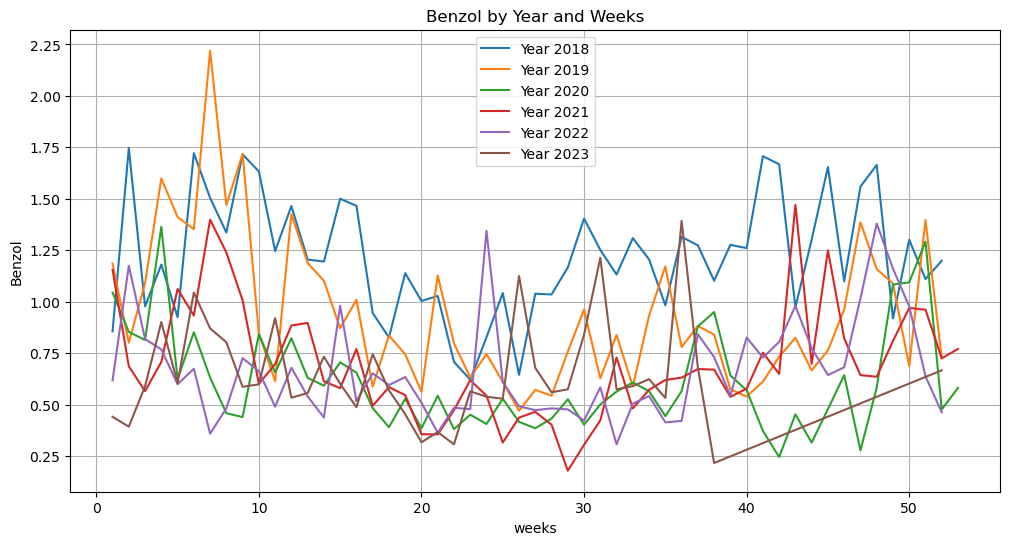

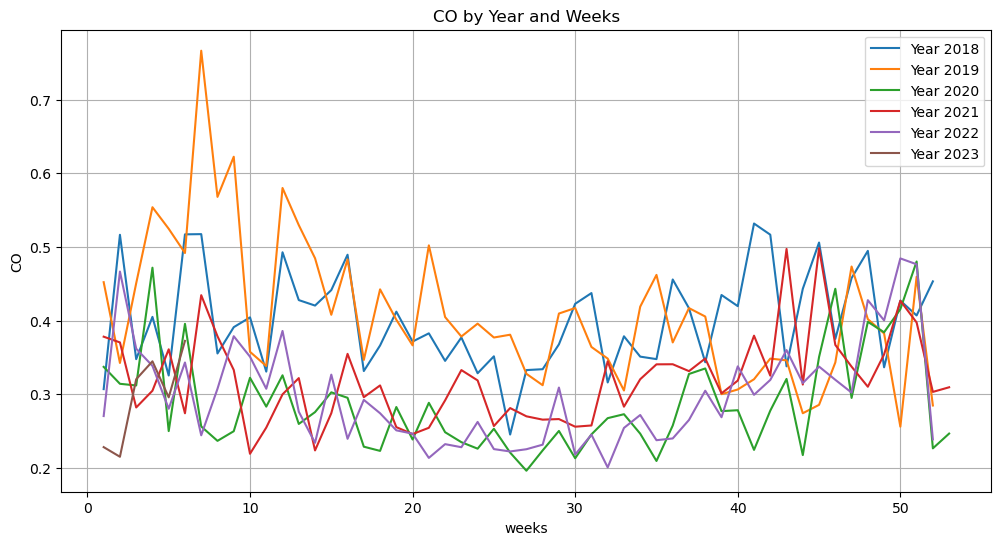

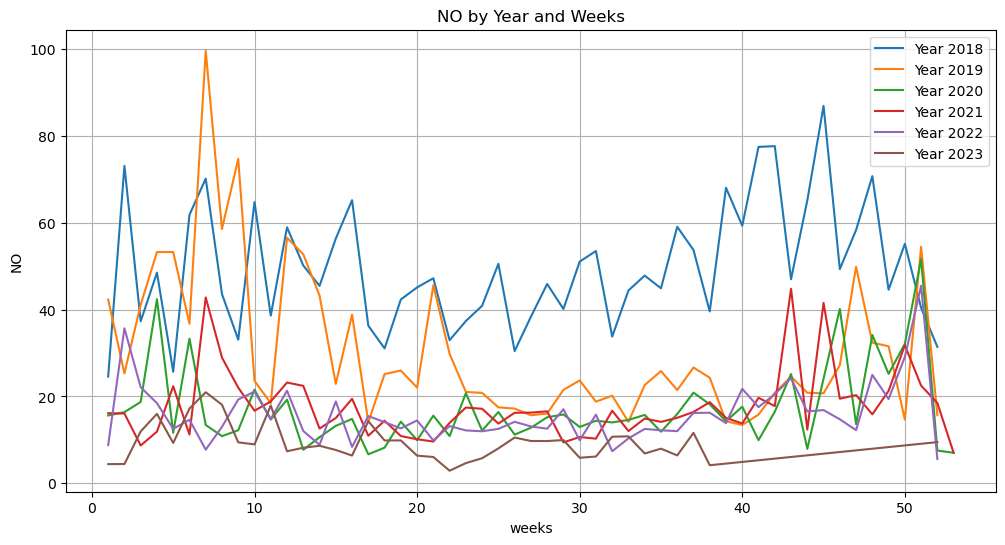

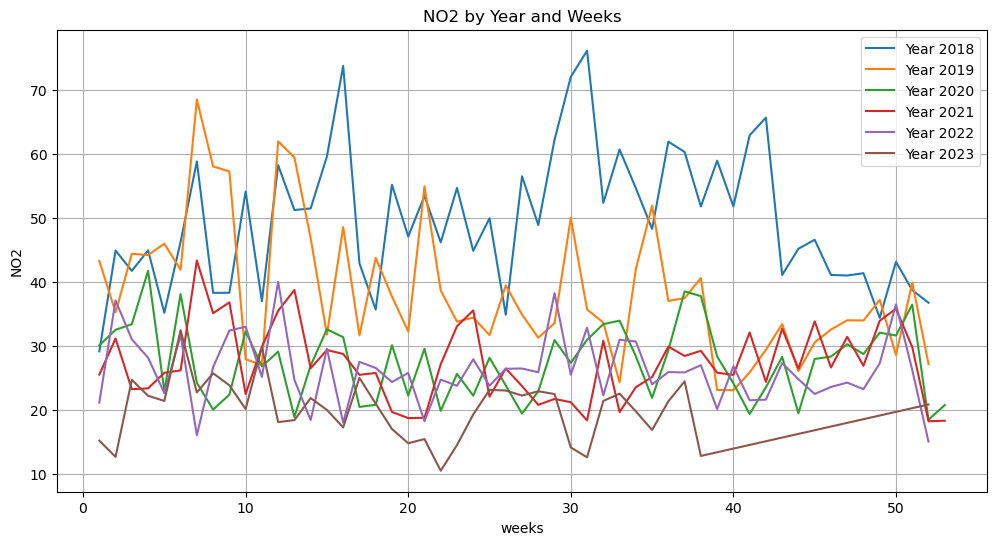

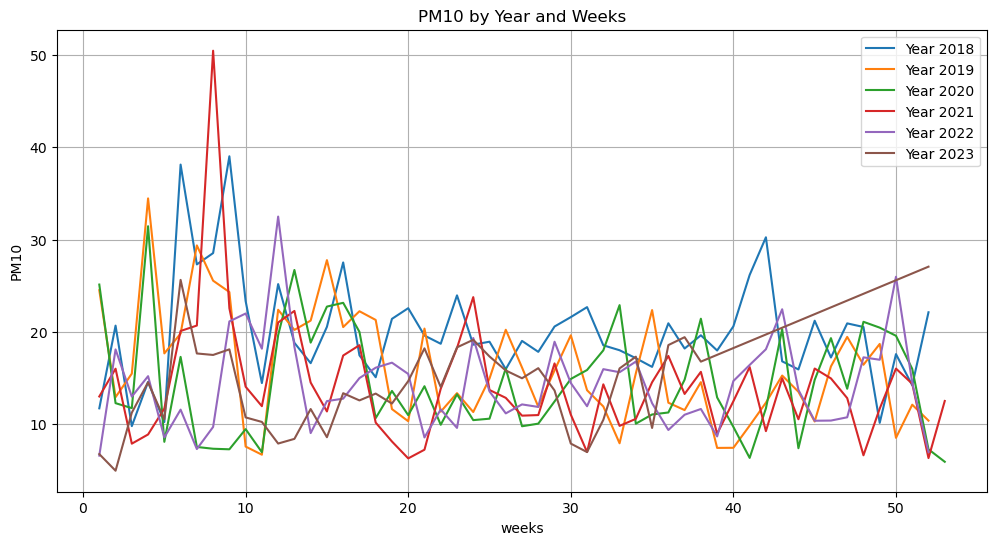

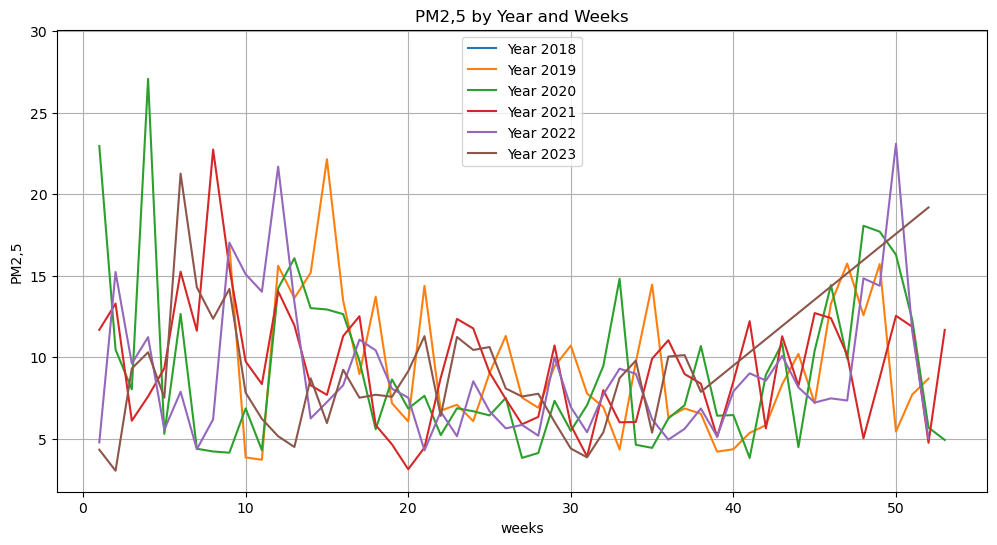

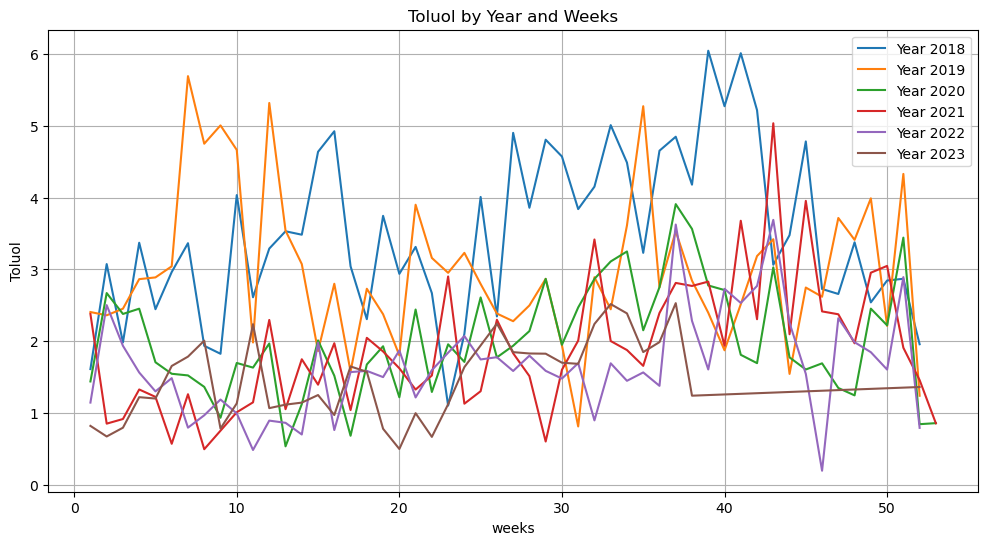

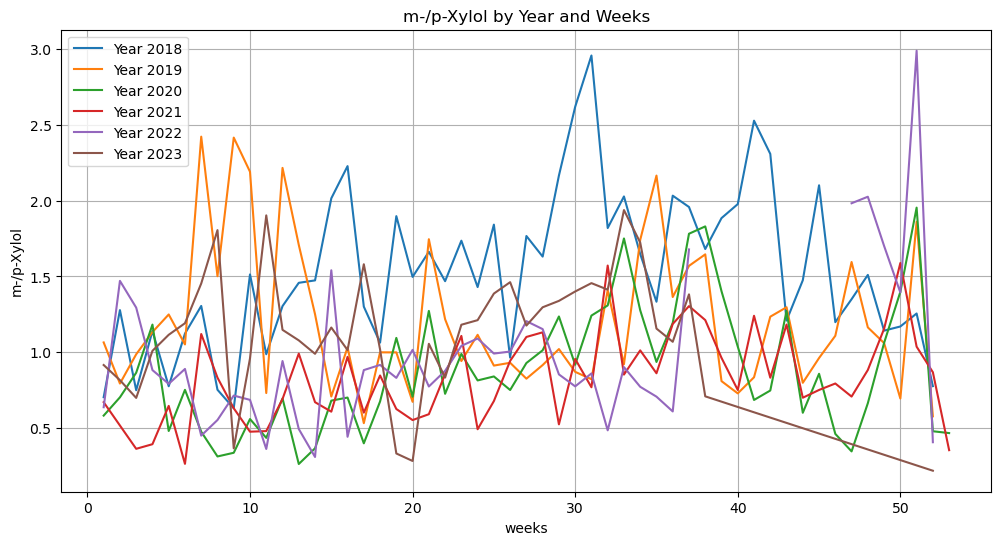

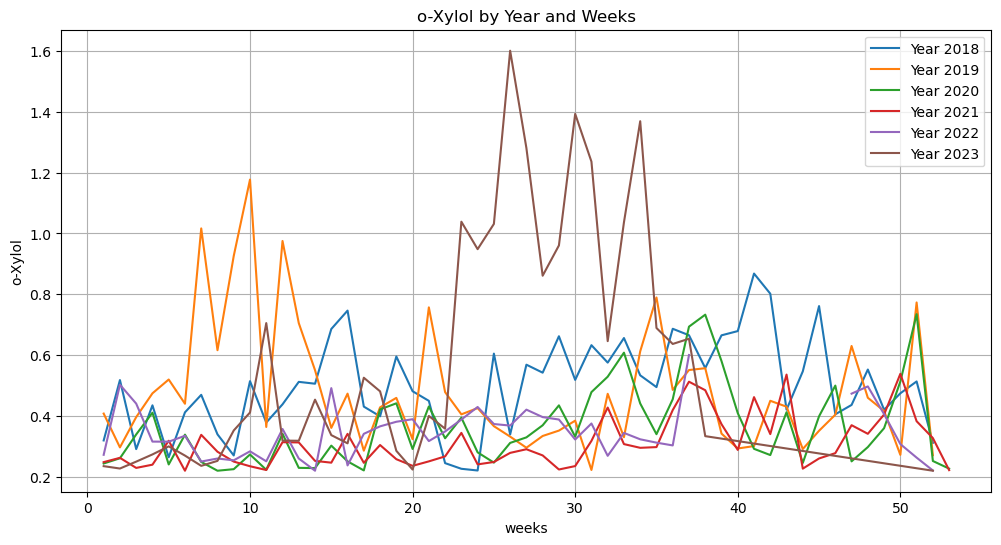

In [52]:
# distribution of pollutants per month

columns_to_plot = emissions_week.columns.difference(['year', 'weeks'])

# Loop through each column and create a separate plot for each year
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    
    for year in emissions_week.index.get_level_values('year').unique():
        year_data = emissions_week.loc[year].reset_index()
        plt.plot(year_data['weeks'], year_data[column], label=f'Year {year}')

    plt.xlabel('weeks')
    plt.ylabel(column)
    plt.title(f'{column} by Year and Weeks')
    plt.legend()
    plt.grid(True)
    plt.show()
